# PM10 and Weather data gathering (All BE stations - BE: 79)

### Plain txt file to dataframe

Background-rural both for Ozone (O3 - Max daily 8-hour mean *max8h* ozone concentrations) is being read from disk as a CSV file (Older database: https://www.eea.europa.eu/data-and-maps/data/airbase-the-european-air-quality-database-8) for the stations in Belgium: "BExxxxx0001xxx"

In [45]:
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from datetime import timedelta
from numpy import genfromtxt

dirpath = "AirBase_BE_v8/PM10Belgium"
fnames = listdir(dirpath)  # Read all files in directory
stationLabels = ['PM10_'] * len(fnames)  # Suffix for Ozone label
for i in range(len(fnames)):
    stationLabels[i] += fnames[i][:7]  # Add the first area code name
columnLabels = ['PARCS','CI','RSN','SST','ISTL1','ISTL2','ISTL3','ISTL4',  # Attach all the ECMWF weather labels
                 'SWVL1','SWVL2','SWVL3','SWVL4','10FG','LSPF','CAPE','SP','W','STL1','SD','LSP','CP','SF','SSHF','MSL','BLH',
                 'TCC','10U','V','2T','2D','SSRD','STL2','STRD','SSR','TTR','E','STL3','LCC','MCC','HCC','SRC','MX2T','MN2T',
                 'RO','TCO3','TP','IEWS','SKT','STL4','FAL','FSR']
columnLabels = stationLabels + columnLabels  # Join lists
for i in range(len(fnames)):
    columnLabels.append(stationLabels[i] + "-1")  # Append the lag-1 day values

In [46]:
# 1 loop to instantiate minDate & maxDate
for i in range(0, 1):
    fname = fnames[i]
    dfColumn = stationLabels[i]
    columnNames = ['month']
    for i in range(1,32):  # First column is sensor reading, second is validity of day (1 == OK, 0, -1 = NOT OK)
        columnNames.append(str(i))
        columnNames.append('validity{}'.format(i))
    df1 = pd.read_csv(dirpath + "/" + fname, sep='\t', names=columnNames, lineterminator='\n')
    df1['month'] = pd.to_datetime(df1['month'])
    currentMinDate = min(df1['month'])
    currentMaxDate = max(df1['month']) + timedelta(days=30) # Add 30 days to December 1st   
minDate = currentMinDate
maxDate = currentMaxDate

# Now, do search all files for minDate, MaxDate
for i in range(0, len(fnames)):
    fname = fnames[i]
    dfColumn = stationLabels[i]
    columnNames = ['month']
    for i in range(1,32):  # First column is sensor reading, second is validity of day (1 == OK, 0, -1 = NOT OK)
        columnNames.append(str(i))
        columnNames.append('validity{}'.format(i))

    df1 = pd.read_csv(dirpath + "/" + fname, sep='\t', names=columnNames, lineterminator='\n')
    df1['month'] = pd.to_datetime(df1['month'])

    currentMinDate = min(df1['month'])
    currentMaxDate = max(df1['month']) + timedelta(days=30) # Add 30 days to December 1st
    
    if currentMinDate < minDate:
        minDate = currentMinDate
    if currentMaxDate > maxDate:
        maxDate = currentMaxDate       

print ("Min date: {}, Max Date: {}".format(minDate, maxDate))
ts = pd.DataFrame(np.nan, index=pd.date_range(start=minDate, end=maxDate, freq='D'), columns=columnLabels)

Min date: 1994-01-01 00:00:00, Max Date: 2012-12-31 00:00:00


In [48]:
for i in range(0, len(fnames)):
    fname = fnames[i]
    dfColumn = stationLabels[i]
    columnNames = ['month']
    for i in range(1,32):  # First column is sensor reading, second is validity of day (1 == OK, 0, -1 = NOT OK)
        columnNames.append(str(i))
        columnNames.append('validity{}'.format(i))

    df1 = pd.read_csv(dirpath + "/" + fname, sep='\t', names=columnNames, lineterminator='\n')
    df1['month'] = pd.to_datetime(df1['month'])

    minDate = min(df1['month'])
    maxDate = max(df1['month']) + timedelta(days=30) # Add 30 days to December 1st

    for row in df1.itertuples(index=True, name='df1'): # Foreach month
        date = row[1]
        for columnIndex in range(1, df1.shape[1]): # Foreach day
            if columnIndex % 2 == 0: # Even column
                if row[columnIndex + 1] == 1: # If sensor reading valid
                    currentDate = date + timedelta(days=((columnIndex - 2) / 2)) # Get year-month-day
                    try:
                        ts.at[currentDate, dfColumn] = row[columnIndex] # Set value to time-series
                    except AttributeError as error:
                        print("fname: ", fname)
                        print("Error: ", error)
                        break

columnLabels               

['PM10_BE0312A',
 'PM10_BEGRT01',
 'PM10_BELAB01',
 'PM10_BELAB02',
 'PM10_BELAL01',
 'PM10_BELAL02',
 'PM10_BELAL05',
 'PM10_BELGK06',
 'PM10_BELGK09',
 'PM10_BELHB23',
 'PM10_BELHR01',
 'PM10_BELKO01',
 'PM10_BELML01',
 'PM10_BELMN01',
 'PM10_BELOB01',
 'PM10_BELOB02',
 'PM10_BELRL01',
 'PM10_BELSA04',
 'PM10_BELSZ02',
 'PM10_BELTR01',
 'PM10_BELWZ01',
 'PM10_BELZD01',
 'PM10_BETAND3',
 'PM10_BETB011',
 'PM10_BETH201',
 'PM10_BETM204',
 'PM10_BETM705',
 'PM10_BETM802',
 'PM10_BETMEU1',
 'PM10_BETN043',
 'PM10_BETN045',
 'PM10_BETN052',
 'PM10_BETN054',
 'PM10_BETN060',
 'PM10_BETN063',
 'PM10_BETN066',
 'PM10_BETN067',
 'PM10_BETN070',
 'PM10_BETN073',
 'PM10_BETN085',
 'PM10_BETN093',
 'PM10_BETN100',
 'PM10_BETN113',
 'PM10_BETN121',
 'PM10_BETN132',
 'PM10_BETR001',
 'PM10_BETR012',
 'PM10_BETR020',
 'PM10_BETR201',
 'PM10_BETR221',
 'PM10_BETR222',
 'PM10_BETR223',
 'PM10_BETR240',
 'PM10_BETR501',
 'PM10_BETR502',
 'PM10_BETR510',
 'PM10_BETR511',
 'PM10_BETR512',
 'PM10_BETR701

In [47]:
print("Station count: ", len(fnames))

Station count:  73


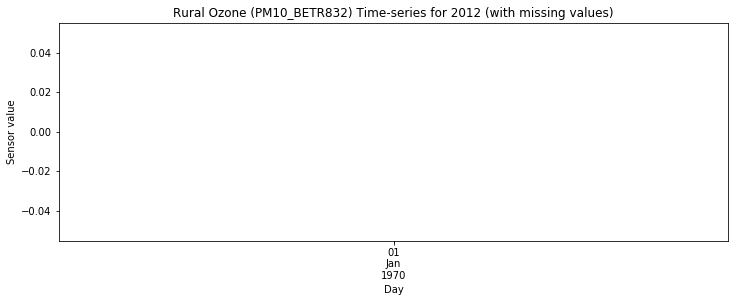

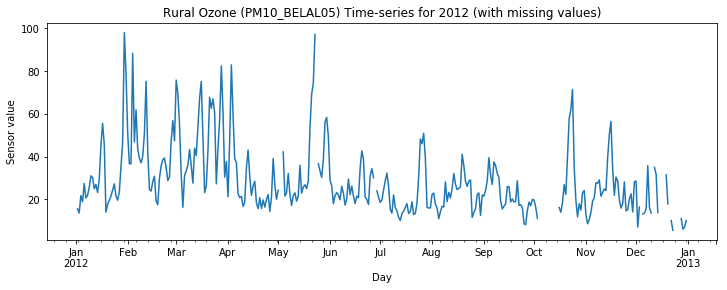

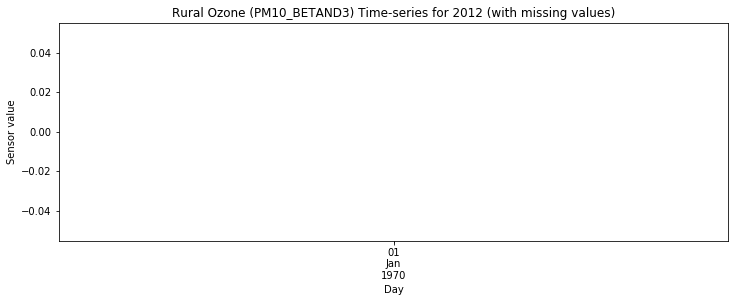

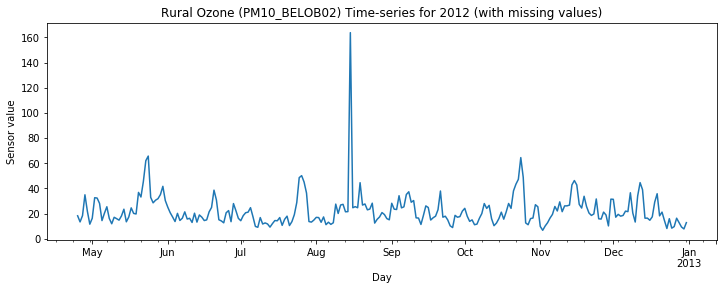

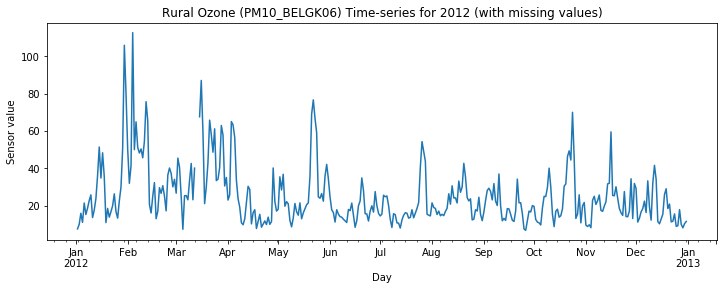

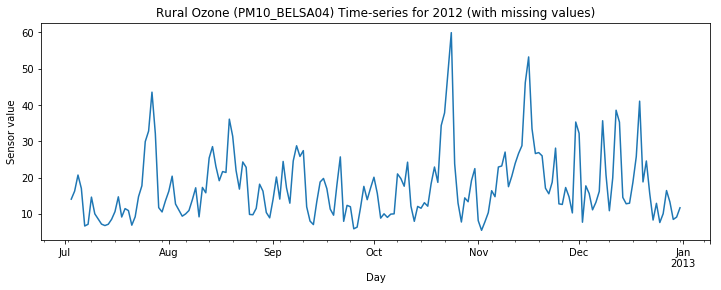

In [7]:
# Test plot stations
stationsToCheck = ['PM10_BETR832', 'PM10_BELAL05', 'PM10_BETAND3', 'PM10_BELOB02', 'PM10_BELGK06','PM10_BELSA04']
for stationToCheck in stationsToCheck:
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    ax.set_ylabel('Sensor value')
    ax.set_xlabel('Day')
    ax.set_title('Rural Ozone ({}) Time-series for 2012 (with missing values)'.format(stationToCheck))
    ax.grid(True)
    ts.tail(365)[stationToCheck].plot(ax = ax);

### On missing values get the reading from the closest station

Get station lon/lat coordinates:

In [8]:
# Get station coordinates
import re, collections
from lxml import etree
import xml.etree.ElementTree as ET

tree = ET.parse('BE_meta.xml')
root = tree.getroot()

stationLonLat = {}
# stationLonLat["BELOB02"] = (3.376, 50.914)  # Manually add BELOB02 40OB02 - WIELSBEKE (lon/lat was missing)
# stationLonLat["BELSA04"] = (4.4042624, 51.3135154)
# stationLonLat["BETR834"] = (4.3799862, 51.0916466)

for child in root:    
    for child1 in child:          
        if child1.tag == "station":           
            if child1.attrib['Id'].startswith("BE"):  # TODO: 
                for child2 in child1:
                    if child2.tag == "station_info":
                        lon = 0.0
                        lat = 0.0
                        for child3 in child2:         
                            if child3.tag == "station_latitude_decimal_degrees":
                                lat = child3.text
                            if child3.tag == "station_longitude_decimal_degrees":
                                lon = child3.text                        
                        stationLonLat[child1.attrib['Id'][:7]] = (float(lon), float(lat))

# Remove stations without max8h file on disk
stationsToDelete = []
for stationKey in stationLonLat.keys():
    if not "PM10_" + stationKey in stationLabels:
        stationsToDelete.append(stationKey)

for stationToDelete in stationsToDelete:
    del stationLonLat[stationToDelete]
        

Store an ordered dictionary for the next closest station of the current:

In [9]:
import math
from collections import OrderedDict

def getDistanceDegrees(station1, station2):
    return math.sqrt((stationLonLat[station1][0] -stationLonLat[station2][0])**2 + (stationLonLat[station1][1] -stationLonLat[station2][1])**2)

distanceStationToStation = {}

for station1 in stationLonLat.keys():
    distancesToStation = {}
    for station2 in stationLonLat.keys():
        if station1 != station2:
            distancesToStation[station2] = getDistanceDegrees(station1, station2) 
    distanceStationToStation[station1] = OrderedDict(sorted(distancesToStation.items(), key=lambda t: t[1]))
    

In [10]:
distanceStationToStation["BELOB02"].keys()

odict_keys(['BELOB01', 'BETN052', 'BELKO01', 'BETM705', 'BE0312A', 'BELRL01', 'BELMN01', 'BETN060', 'BETR701', 'BETR731', 'BETR710', 'BETR740', 'BETR750', 'BELHR01', 'BETN070', 'BELTR01', 'BETB011', 'BETAND3', 'BELAL02', 'BETR001', 'BELAL05', 'BETR012', 'BETR832', 'BELZD01', 'BELHB23', 'BETR815', 'BETN043', 'BETMEU1', 'BELAB01', 'BETR834', 'BELAB02', 'BETWOL1', 'BETR831', 'BELAL01', 'BETR020', 'BETR833', 'BELML01', 'BETR801', 'BETR802', 'BETR841', 'BETM802', 'BELSA04', 'BELSZ02', 'BETR512', 'BETR811', 'BETR511', 'BETR502', 'BETR501', 'BETR510', 'BETN063', 'BETN100', 'BETN073', 'BEGRT01', 'BETN054', 'BELWZ01', 'BETN093', 'BETN045', 'BETR240', 'BELGK06', 'BETN121', 'BELGK09', 'BETR223', 'BETH201', 'BETR222', 'BETR201', 'BETM204', 'BETR221', 'BETN113', 'BETN132', 'BETN067', 'BETN066', 'BETN085'])

Check if distances of a specific station are indeed ordered:

In [11]:
distanceStationToStation["BETN073"].keys()

odict_keys(['BETN054', 'BETN093', 'BETN063', 'BETR240', 'BETR510', 'BETR502', 'BETR223', 'BETR501', 'BETN100', 'BETH201', 'BETR511', 'BETN045', 'BETR222', 'BETR512', 'BETR201', 'BELSZ02', 'BETM204', 'BELGK06', 'BETR221', 'BETN121', 'BELGK09', 'BETWOL1', 'BETR012', 'BETR020', 'BETMEU1', 'BETN043', 'BETR841', 'BEGRT01', 'BELML01', 'BETR001', 'BETAND3', 'BELWZ01', 'BETN113', 'BETB011', 'BETR834', 'BETR832', 'BETR811', 'BETR801', 'BETR802', 'BELHB23', 'BETM802', 'BELAL01', 'BETR815', 'BELZD01', 'BELHR01', 'BELSA04', 'BETN067', 'BETN132', 'BELAB01', 'BETN066', 'BELTR01', 'BETN085', 'BETR833', 'BELAL05', 'BETN070', 'BETR831', 'BELAB02', 'BELAL02', 'BETR710', 'BETR740', 'BETR750', 'BETR701', 'BETR731', 'BETN060', 'BELOB02', 'BETN052', 'BELOB01', 'BELKO01', 'BETM705', 'BE0312A', 'BELMN01', 'BELRL01'])

In [12]:
distanceStationToStation["BETN073"]

OrderedDict([('BETN054', 0.2384026903392695),
             ('BETN093', 0.33611091541929794),
             ('BETN063', 0.3546874220408722),
             ('BETR240', 0.41693307642954036),
             ('BETR510', 0.47517768309233427),
             ('BETR502', 0.5348304931041228),
             ('BETR223', 0.5409818440474693),
             ('BETR501', 0.5443068534365513),
             ('BETN100', 0.5662376088401381),
             ('BETH201', 0.5722400361614004),
             ('BETR511', 0.5774254005098836),
             ('BETN045', 0.5790598361352652),
             ('BETR222', 0.5922212472387324),
             ('BETR512', 0.6000607293432878),
             ('BETR201', 0.6001511919449966),
             ('BELSZ02', 0.6285940146620895),
             ('BETM204', 0.6322119994883059),
             ('BELGK06', 0.6428523938300333),
             ('BETR221', 0.6580828429559623),
             ('BETN121', 0.6611531502488646),
             ('BELGK09', 0.6640067350870791),
             ('BETWOL1', 0.6647

In [13]:
ts2 = ts.copy()
for dataRow in ts2.itertuples(index=True, name='Pandas'):
    date = dataRow[0]
    for stationLabel in stationLabels:
        if np.isnan(ts2.at[date, stationLabel]):  # If no value at station
            for closestStationLabel in distanceStationToStation[stationLabel[-7:]].keys():
                closestValue = ts.at[date, "PM10_" + closestStationLabel]
                if not np.isnan(closestValue):
                    ts2.at[date, stationLabel] = closestValue
                    break  # Exit the loop    
ts = ts2                    

In [16]:
ts2.head(365)["PM10_BELOB02"].head(20)

1994-01-01   NaN
1994-01-02   NaN
1994-01-03   NaN
1994-01-04   NaN
1994-01-05   NaN
1994-01-06   NaN
1994-01-07   NaN
1994-01-08   NaN
1994-01-09   NaN
1994-01-10   NaN
1994-01-11   NaN
1994-01-12   NaN
1994-01-13   NaN
1994-01-14   NaN
1994-01-15   NaN
1994-01-16   NaN
1994-01-17   NaN
1994-01-18   NaN
1994-01-19   NaN
1994-01-20   NaN
Freq: D, Name: PM10_BELOB02, dtype: float64

Check if missing values indeed filled:

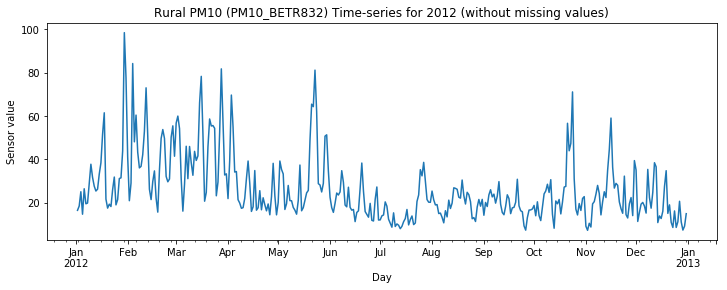

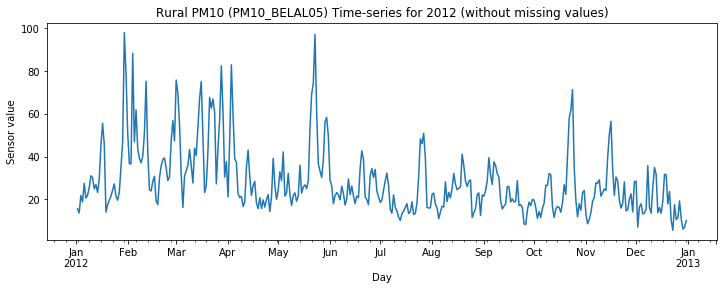

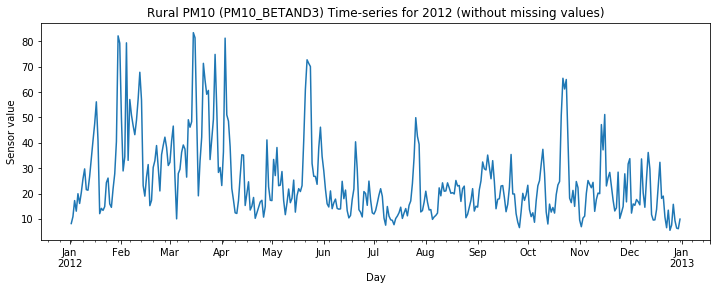

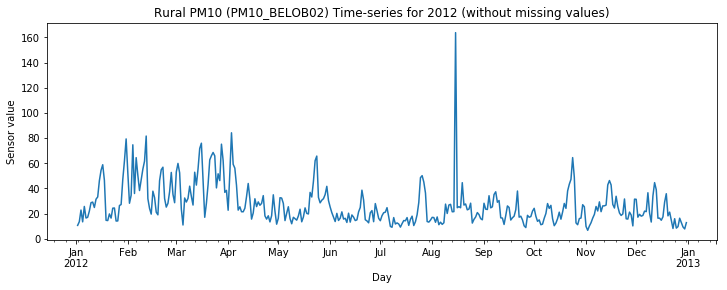

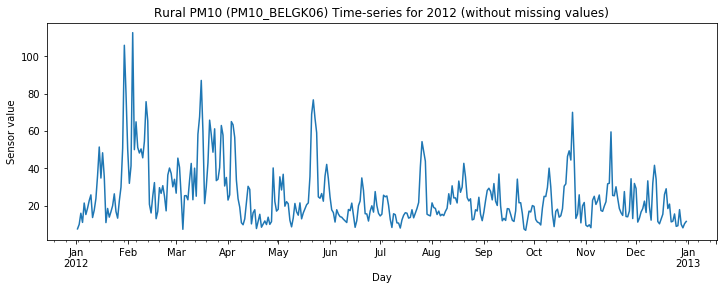

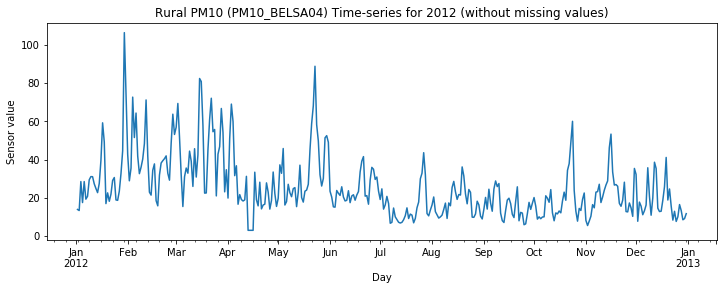

In [15]:
# Test plot stations
for stationToCheck in stationsToCheck:
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    ax.set_ylabel('Sensor value')
    ax.set_xlabel('Day')
    ax.set_title('Rural PM10 ({}) Time-series for 2012 (without missing values)'.format(stationToCheck))
    ax.grid(True)
    ts.tail(365)[stationToCheck].plot(ax = ax);

Adding weather data into the dataframe:

In [17]:
# Read geo-weather data
weatherData = genfromtxt('ECMWF\BETN073_51vars_19900101To20171231.csv', delimiter=',')

columns = len(weatherData[0])
row = -1
column = -1
addedColumns = len(stationLabels)

# Attach weather data
for dataRow in ts.itertuples(index=True, name='Pandas'):    
    date = dataRow[0]
    row += 1       
    if row < weatherData.shape[0] and column < weatherData.shape[1]:
        for column in range(columns):  
            ts.at[date, columnLabels[column + addedColumns]] = weatherData[row][column] # Set value to time-series        

Add 1-day lags:

In [18]:
# columns = len(weatherData[0])
row = -1
column = -1
# addedColumns = len(stationLabels)
PM10lags = [0] * addedColumns

# Attach weather data
for dataRow in ts.itertuples(index=True, name='Pandas'):    
    date = dataRow[0]
    for i in range(len(stationLabels)):
        ts.at[date, stationLabels[i] + '-1'] = PM10lags[i] # Get lag value
        PM10lags[i] = ts.at[date, stationLabels[i]]  # Set next lag value

In [19]:
ts.head(6000).tail(5)["PM10_BETN073"]

2010-06-01    45.2
2010-06-02    23.3
2010-06-03    17.8
2010-06-04    23.3
2010-06-05    31.5
Freq: D, Name: PM10_BETN073, dtype: float64

In [20]:
ts.head(6000).tail(5)["PM10_BETN132"]

2010-06-01    21.779
2010-06-02    22.467
2010-06-03    13.258
2010-06-04     8.863
2010-06-05     8.738
Freq: D, Name: PM10_BETN132, dtype: float64

In [21]:
ts.head(6000).tail(5)["PARCS"]

2010-06-01    2990379.0
2010-06-02    2987812.0
2010-06-03    2989369.0
2010-06-04    2993987.0
2010-06-05    3002104.0
Freq: D, Name: PARCS, dtype: float64

In [22]:
ts.head(6000).tail(5)["FSR"]

2010-06-01    0.146394
2010-06-02    0.146390
2010-06-03    0.146392
2010-06-04    0.146391
2010-06-05    0.146393
Freq: D, Name: FSR, dtype: float64

Time-series plot of O3, first 365 days (1990, with missing data):

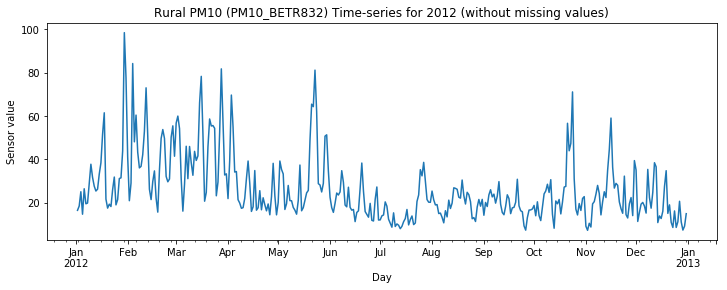

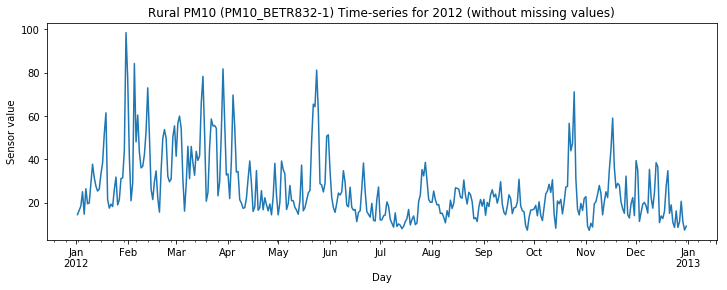

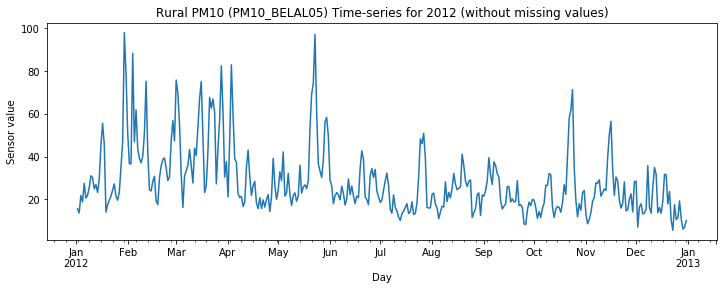

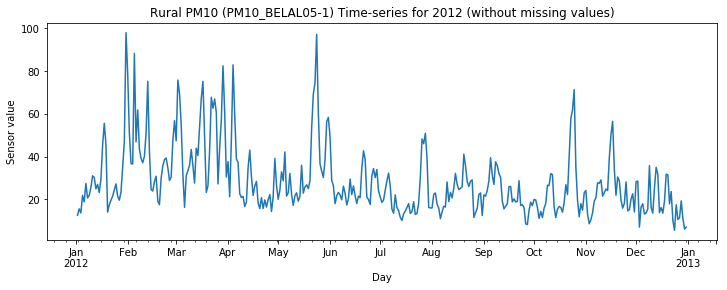

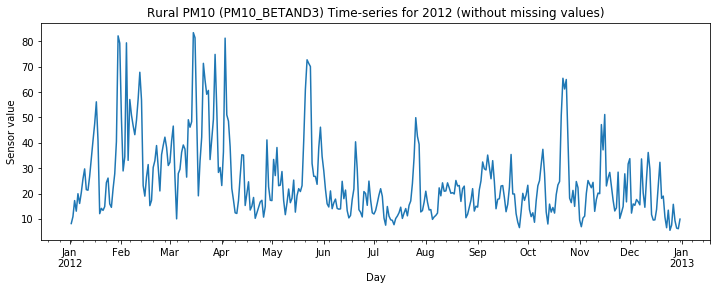

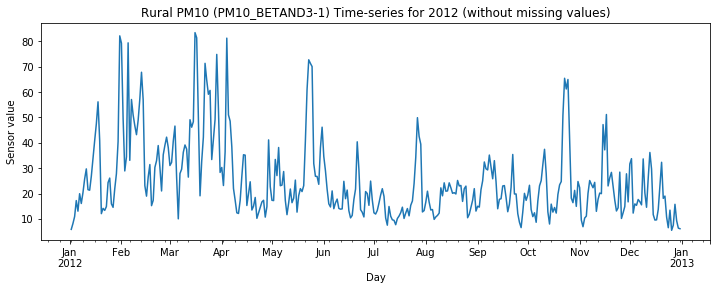

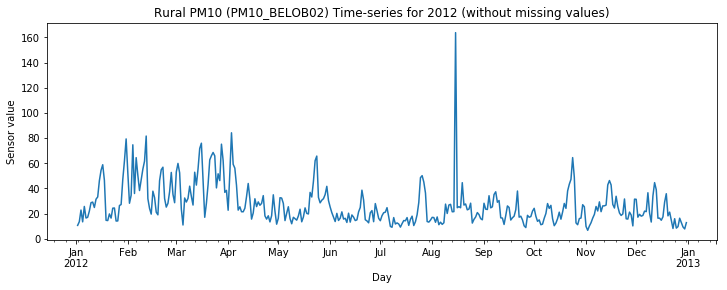

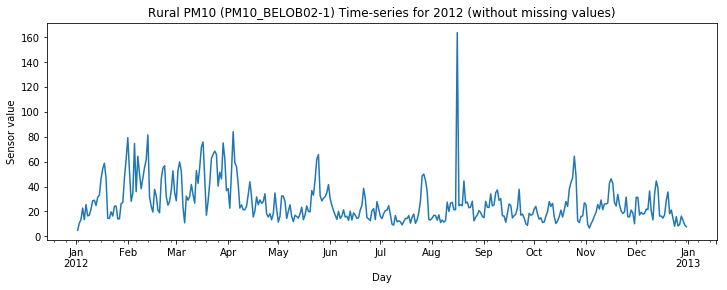

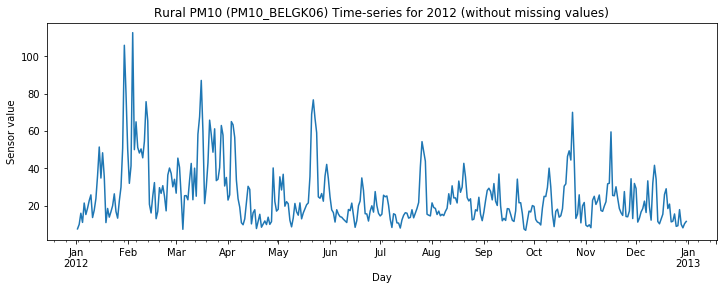

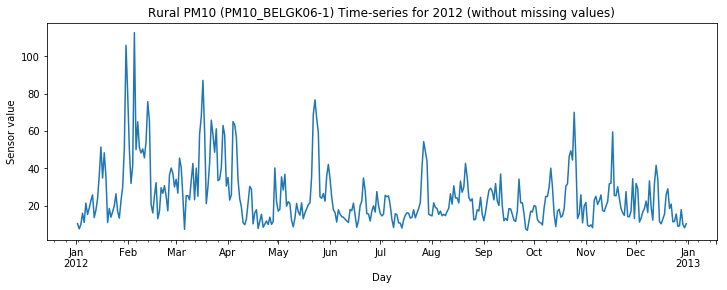

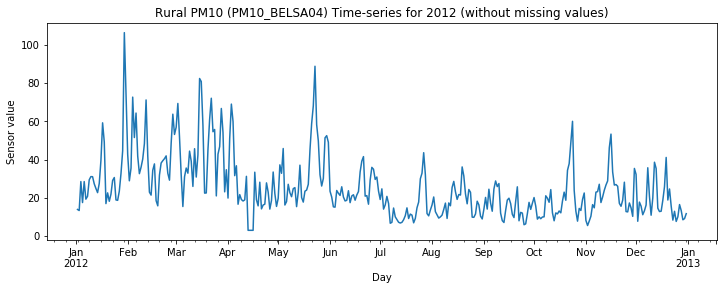

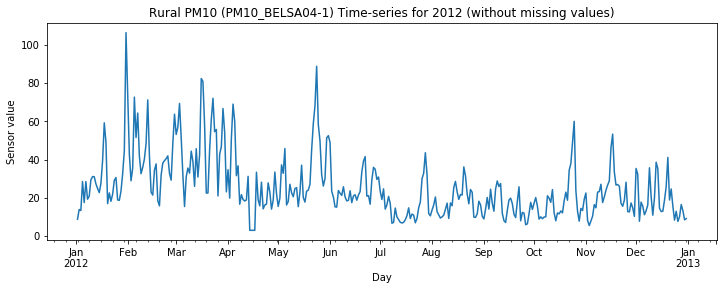

In [23]:
# Test plot stations and lags
for stationToCheck in stationsToCheck:
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    ax.set_ylabel('Sensor value')
    ax.set_xlabel('Day')
    ax.set_title('Rural PM10 ({}) Time-series for 2012 (without missing values)'.format(stationToCheck))
    ax.grid(True)
    ts.tail(365)[stationToCheck].plot(ax = ax);
    
    stationToCheckLag = stationToCheck + "-1"
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    ax.set_ylabel('Sensor value')
    ax.set_xlabel('Day')
    ax.set_title('Rural PM10 ({}) Time-series for 2012 (without missing values)'.format(stationToCheckLag))
    ax.grid(True)
    ts.tail(365)[stationToCheckLag].plot(ax = ax);

Plot other time-series variables (Temperature 2m):

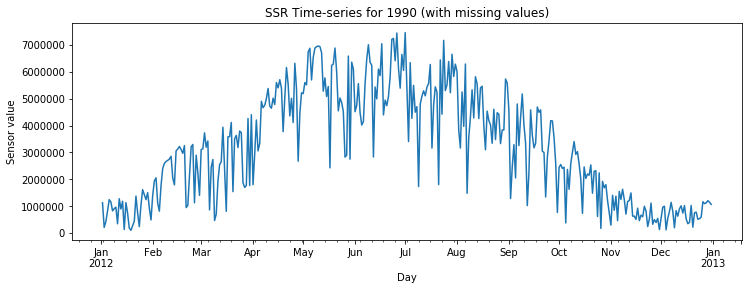

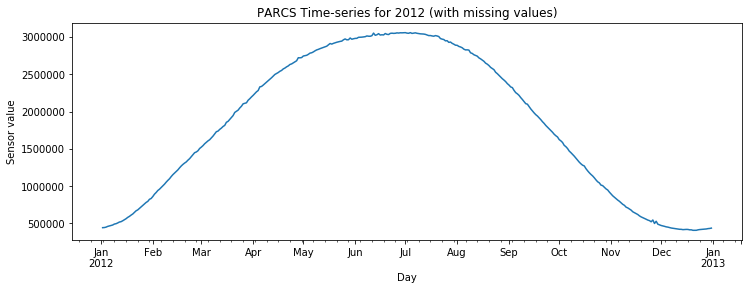

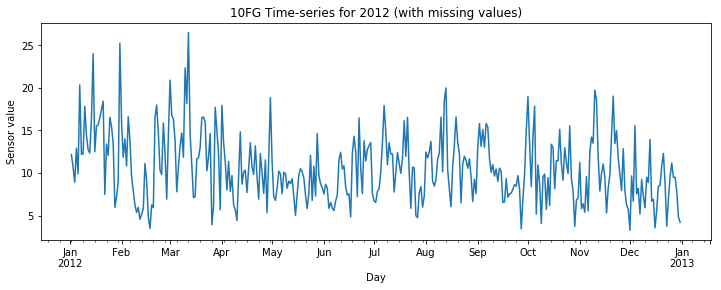

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_ylabel('Sensor value')
ax.set_xlabel('Day')
ax.set_title('SSR Time-series for 1990 (with missing values)')
ax.grid(True)
# ts.tail(365)['2T'].plot(ax = ax);
# ['O3', '10FG', 'BLH', '10U', '2T', 'SSR', 'SUND', 'O3-1']
#['O3','PARCS','CI','RSN','SST','ISTL1','ISTL2','ISTL3','ISTL4','SWVL1','SWVL2','SWVL3','SWVL4','10FG','LSPF','CAPE','SP','W','STL1','SD','LSP','CP','SF','SSHF','MSL','BLH','TCC','10U','V','2T','2D','SSRD','STL2','STRD','SSR','TTR','E','STL3','LCC','MCC','HCC','SRC','MX2T','MN2T','RO','TCO3','TP','IEWS','SKT','STL4','FAL','FSR','O3-1']
ts.tail(365)['SSR'].plot(ax = ax);

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_ylabel('Sensor value')
ax.set_xlabel('Day')
ax.set_title('PARCS Time-series for 2012 (with missing values)')
ax.grid(True)
ts.tail(365)['PARCS'].plot(ax = ax);

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_ylabel('Sensor value')
ax.set_xlabel('Day')
ax.set_title('10FG Time-series for 2012 (with missing values)')
ax.grid(True)
ts.tail(365)['10FG'].plot(ax = ax);

Lag variable (-1 day):

In [ ]:
ts.tail(10)[stationLabels[0]]  

In [ ]:
ts.tail(10)[stationLabels[0] + '-1']

In [ ]:
ts.tail(10)[stationLabels[1]]

In [ ]:
ts.tail(10)[stationLabels[1] + '-1']

In [ ]:
ts.tail(10)[stationLabels[2]]

In [ ]:
ts.tail(10)[stationLabels[2] + '-1']

In [ ]:
ts.tail(10)[stationLabels[3]]

In [ ]:
ts.tail(10)[stationLabels[3] + '-1']

Not useful interpolations: Cubic and Spline (order 2-5+) seem to have very high leverage, skewing the original data:

Useful interpolations: 'from_derivatives' (piecewise polynomial interpolation) and linear. (Probably) the most interesting interpolation: PCHIP 1-d monotonic cubic interpolation (see:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.PchipInterpolator.html#scipy.interpolate.PchipInterpolator). Compared to the plain cubic interpolation, doesn't seem to skew the original data points. Pchip looks similar to the linear interpolation, with some extra smoothing.

In [ ]:
ts2a = ts.interpolate(method='linear',limit=20,limit_direction='both')
ts2b = ts.interpolate(method='from_derivatives',limit=20,limit_direction='both')
ts2c = ts.interpolate(method='pchip',limit=20,limit_direction='both')
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), sharex=True, sharey=True)
ax[0].set_ylabel('Sensor value')
ax[0].set_xlabel('Day')
ax[0].set_title('PM10 Time-series for 1990 (linear interpolation)')
ax[1].set_title('PM10 Time-series for 1990 (piecewise polynomial interpolation)')
ax[2].set_title('PM10 Time-series for 1990 (pchip: 1-d monotonic cubic interpolation)')
ts2a.head(365)['PM10_BETN054'].plot(ax = ax[0]);
ts2b.head(365)['PM10_BETN054'].plot(ax = ax[1]);
ts2c.head(365)['PM10_BETN054'].plot(ax = ax[2]);

In [28]:
ts_interpolated = ts.interpolate(method='linear',limit=7,limit_direction='both')  # 7 days
ts_interpolated.head(10)['PM10_BETN066']

1994-01-01   NaN
1994-01-02   NaN
1994-01-03   NaN
1994-01-04   NaN
1994-01-05   NaN
1994-01-06   NaN
1994-01-07   NaN
1994-01-08   NaN
1994-01-09   NaN
1994-01-10   NaN
Freq: D, Name: PM10_BETN066, dtype: float64

In [ ]:
ts_interpolated.head(30)['PM10_BETN054-1']

In [ ]:
ts_interpolated.head(30)['PM10_BETN054']

In [29]:
print("Count of NaN values: ", np.isnan(ts_interpolated).any().sum())

Count of NaN values:  146


In [30]:
print("Count of zero values: ", ts_interpolated.size - np.count_nonzero(ts_interpolated))

Count of zero values:  61188


In [31]:
# Store to time-series csv
file_name = "ALL_BE_51vars_PM10_PM10-1_19940101To20121231.csv"
ts_interpolated.to_csv(file_name, sep=',', encoding='utf-8')